## Part 5: Modeling with experimental data

### 5.1 Load experimental data

In [33]:
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
# sfw_matrix = pd.read_pickle('results/sfw_matrix.pickle')
trophic_levels = pd.read_pickle('results/trophic_levels.pickle')
G = nx.read_gpickle('results/G.pickle')

In [35]:
# To-do: button to import experimental data

In [36]:
# ***Developer code***
df_field = pd.read_csv("data/RecastingFieldExperiment.txt", sep="\t")
#df_field

### 5.2 Preprocessing experiemtnal data

To-Do: Explain that these sections are specific to the case data

In [37]:
# Create df for Plot A # What if user has no plots?
df_field_a = df_field[df_field["Plot_ID"] == "A"].copy()
# Sort by OTU
df_field_a.sort_values("OTU", inplace=True)

# Add new column with removed log  
df_field_a["Biomass"] = 10**(df_field_a["Log10(Biomass)"])
df_field_a["Mass"] = 10**(df_field_a["Log10(Mass)"])
df_field_a["Abundance"] = 10**(df_field_a["Log10(Abundance)"])

# Quantify organisms
OTUs = df_field_a.OTU.unique()
print(f"Number of OTUs in plot A: {len(OTUs)}") #How should we name OTUs (organisms)? Or rather 
trophic_groups = df_field_a.Trophic_ID.unique()
print(f"Number of trophic groups in plot A: {len(trophic_groups)}")

# Create dictionary for number of times an organism appears (nr. of replicates)
organism_count = df_field_a.OTU.value_counts()
trophic_group_count = df_field_a.Trophic_ID.value_counts()

#df_field_a

Number of OTUs in plot A: 96
Number of trophic groups in plot A: 23


In [38]:
# To-do: piechart

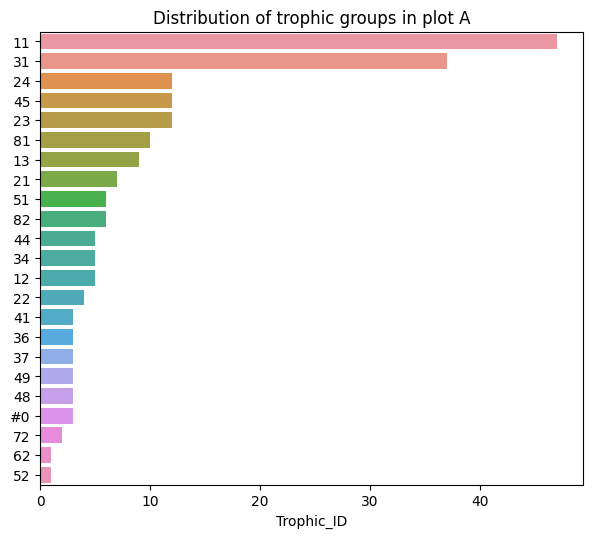

In [39]:
# Should we plot distribution of trophic groups?
fig, plot = plt.subplots(figsize = (7,6), dpi = 100)
plot = sns.barplot(y=list(trophic_group_count.index), x=trophic_group_count)
plot.set_title('Distribution of trophic groups in plot A', fontsize = 12);

### 5.3 Calculate the aggregated biomas, mass and abundance per trophic group [can be part of 5.2?]

In [40]:
# To-do: needs to be done in one cell

In [41]:
# Calculate the aggregated biomas per Trophic_ID
# Create dictionary mapping OTUs to Trophic_IDs
OTU2trophicID = pd.Series(df_field_a.Trophic_ID.values, df_field_a.OTU.values).to_dict()

# Calcualte avg biomas by OTU groups
df_group_A_bm = df_field_a.groupby(["OTU"], as_index=False).Biomass.mean()
df_group_A_bm.Biomass = df_group_A_bm.Biomass.round(2)

# Add Trophic_ID to df_group_a
for idx, otu in df_group_A_bm["OTU"].iteritems():
    df_group_A_bm.loc[idx, "Trophic_ID"] = OTU2trophicID[otu]

# Calcualte sum of biomas by trophic groups
df_group_A_bm = df_group_A_bm.groupby("Trophic_ID", as_index=False).Biomass.sum()

# Create dictionary for avg biomass feature
avg_biomass_A = pd.Series(df_group_A_bm.Biomass.values, df_group_A_bm.Trophic_ID.values).to_dict()

# Unify node names and Trophic_ID names in Biomass dict
for key_attr in list(avg_biomass_A):
    for key_node in list(G.nodes):
        if key_attr in key_node:
            avg_biomass_A[key_node] = avg_biomass_A.pop(key_attr)

# Round values
avg_biomass_A = {key : round(avg_biomass_A[key], 2) for key in avg_biomass_A}

# If no "92 Predatory mite (parasitizing mites and nematodes)" add them manually #Need to generalise?
avg_biomass_A["92 Predatory mite (parasitizing mites and nematodes)"] = 0
# dict(sorted(avg_biomass_A.items(), key=lambda item: item[1]))

In [42]:
# Should there be a comment: "'92 Predatory mite (parasitizing mites and nematodes)' was not detected in Plot A and C and has no biomass feature."

In [43]:
# Calculate the aggregated mass per Trophic_ID

# Calcualte avg mass by OTU group
df_group_A_m = df_field_a.groupby(["OTU"], as_index=False).Mass.mean()
# df_group_A_m.Mass = df_group_A_m.Mass.round(4)

# Add Trophic_ID to df_group_a
for idx, otu in df_group_A_m["OTU"].iteritems():
    df_group_A_m.loc[idx, "Trophic_ID"] = OTU2trophicID[otu]

df_group_A_m = df_group_A_m.groupby("Trophic_ID", as_index=False).Mass.sum()
df_group_A_m

# pd.set_option("max_rows", None)

# Create dictionary for avg mass feature
avg_mass_A = pd.Series(df_group_A_m.Mass.values, df_group_A_m.Trophic_ID.values).to_dict()

#Change key "#0" to 00
#avg_mass_A["00"] = avg_mass_A.pop("#0")

# Unify node names and Trophic_ID names in Mass dict
for key_attr in list(avg_mass_A):
    for key_node in list(G.nodes):
        if key_attr in key_node:
            avg_mass_A[key_node] = avg_mass_A.pop(key_attr)

# Round values, many values become 0?
# avg_mass_A = {key : round(avg_mass_A[key], 2) for key in avg_mass_A}
            
# If no "92 Predatory mite (parasitizing mites and nematodes)" add them manually
avg_mass_A["92 Predatory mite (parasitizing mites and nematodes)"] = 0
# dict(sorted(avg_mass_A.items(), key=lambda item: item[1]))

In [44]:
# Calculate the aggregated abundance per Trophic_ID

# Calcualte avg abundance by OTU group
df_group_A_ab = df_field_a.groupby(["OTU"], as_index=False).Abundance.mean()
# df_group_A_m.Abundance = df_group_A_m.Abundance.round(4)

# Add Trophic_ID to df_group_a
for idx, otu in df_group_A_ab["OTU"].iteritems():
    df_group_A_ab.loc[idx, "Trophic_ID"] = OTU2trophicID[otu]

df_group_A_ab = df_group_A_ab.groupby("Trophic_ID", as_index=False).Abundance.sum()
df_group_A_ab

# pd.set_option("max_rows", None)

# Create dictionary for avg mass feature
avg_abund_A = pd.Series(df_group_A_ab.Abundance.values, df_group_A_ab.Trophic_ID.values).to_dict()

#Change key "#0" to 00
#avg_mass_A["00"] = avg_mass_A.pop("#0")

# Unify node names and Trophic_ID names in Abundance dict
for key_attr in list(avg_abund_A):
    for key_node in list(G.nodes):
        if key_attr in key_node:
            avg_abund_A[key_node] = avg_abund_A.pop(key_attr)

# Round values
avg_abund_A = {key : round(avg_abund_A[key], 2) for key in avg_abund_A}            

# If no "92 Predatory mite (parasitizing mites and nematodes)" add them manually [CHECK for other plots!]
avg_abund_A["92 Predatory mite (parasitizing mites and nematodes)"] = 0
# dict(sorted(avg_abund_A.items(), key=lambda item: item[1]))

### 5.4 Adding trophic level, biomass, mass and abundance as attributes to the network

In [45]:
trophic_levels_dict = trophic_levels.to_dict()

# Add trophic level as attribute
nx.set_node_attributes(G, trophic_levels_dict, "trophic_level")
# Add biomas as attribute
nx.set_node_attributes(G, avg_biomass_A, "Biomass")
# Add mass as attribute
nx.set_node_attributes(G, avg_mass_A, "Mass")
# Add abundance as attribute
nx.set_node_attributes(G, avg_abund_A, "Abundance")
# G.nodes(data=True)

In [46]:
# To-Do: create a button to download final network with experimental data

In [47]:
# To-Do: visualisation of final network? Nodes reflecting size of attributes

In [48]:
# ***Dev code***
## Create a pickle of the graph
#nx.write_gpickle(G, "objects/graph-A_4_0", protocol=5)

### 5.5 Calculating total biomas (and abundance?) per trophic level 

In [49]:
# to-do: visualise with log and linear

In [50]:
# Calculate biomass per trophic level
biomass_tl0, biomass_tl1, biomass_tl2, biomass_tl3 = 0.0, 0.0, 0.0, 0.0

for n in G.nodes():
    if G.nodes[n]["trophic_level"] == 0:
        biomass_tl0 += G.nodes[n]["Biomass"]
    elif G.nodes[n]["trophic_level"] == 1:
        biomass_tl1 += G.nodes[n]["Biomass"]
    elif G.nodes[n]["trophic_level"] == 2:
        biomass_tl2 += G.nodes[n]["Biomass"]
    elif G.nodes[n]["trophic_level"] == 3:
        biomass_tl3 += G.nodes[n]["Biomass"]
  
print("--- Total biomas per trophic level ---")           
print(f"Trophic level0 biomass: {round(biomass_tl0, 2)}\nTrophic level1 biomass: {round(biomass_tl1, 2)}\nTrophic level2 biomass: {round(biomass_tl2, 2)}, \nTrophic level3 biomass: {round(biomass_tl3, 2)}")
print(f"Trophic level2&3: {round(biomass_tl2 + biomass_tl3, 2)}")

--- Total biomas per trophic level ---
Trophic level0 biomass: 862053479.33
Trophic level1 biomass: 23187728.31
Trophic level2 biomass: 319919.35, 
Trophic level3 biomass: 79060.65
Trophic level2&3: 398980.0


### 5.6 Preparing abundance rankings per trophic level 

In [51]:
# To-do: compress in one cell

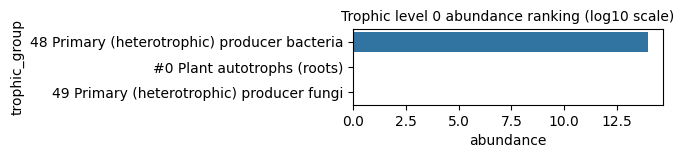

In [52]:
import math
from operator import itemgetter

# trophic level 0
log_tl0_abund = {x: round(math.log10(y["Abundance"]), 2) for x,y in G.nodes(data=True) if y["trophic_level"]==0}
log_tl0_abund = sorted(log_tl0_abund.items(), key=itemgetter(1), reverse=True)

# plot trophic level 0 abundance
log_tl0_abund_df = pd.DataFrame(log_tl0_abund, columns= ["trophic_group", "abundance"])
fig, plot = plt.subplots(figsize = (4,1), dpi = 100)
sns.barplot(y="trophic_group", x="abundance", data=log_tl0_abund_df)
plot.set_title('Trophic level 0 abundance ranking (log10 scale)', fontsize = 10);

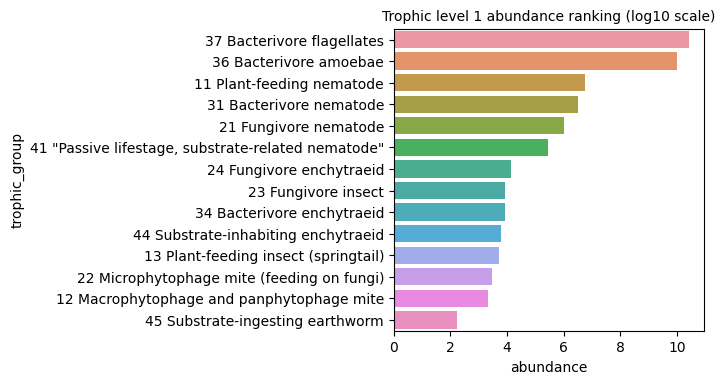

In [53]:
# Rank trophic groups by abundance per trophic level
# trophic level 1
log_tl1_abund = {x: round(math.log10(y["Abundance"]), 2) for x,y in G.nodes(data=True) if y["trophic_level"]==1}
log_tl1_abund = sorted(log_tl1_abund.items(), key=itemgetter(1), reverse=True) 

# plot trophic level 1 abundance
log_tl1_abund_df = pd.DataFrame(log_tl1_abund, columns= ["trophic_group", "abundance"])
fig, plot = plt.subplots(figsize = (4,4), dpi = 100)
sns.barplot(y="trophic_group", x="abundance", data=log_tl1_abund_df)
plot.set_title('Trophic level 1 abundance ranking (log10 scale)', fontsize = 10);

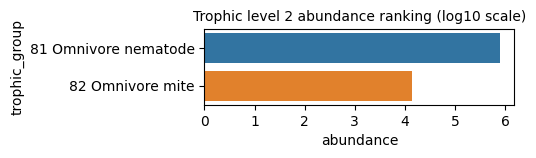

In [54]:
# trophic level 2
log_tl2_abund = {x: round(math.log10(y["Abundance"]), 2) for x,y in G.nodes(data=True) if y["trophic_level"]==2}
log_tl2_abund = sorted(log_tl2_abund.items(), key=itemgetter(1), reverse=True) 

# plot trophic level 2 abundance
log_tl2_abund_df = pd.DataFrame(log_tl2_abund, columns= ["trophic_group", "abundance"])
fig, plot = plt.subplots(figsize = (4,1), dpi = 100)
sns.barplot(y="trophic_group", x="abundance", data=log_tl2_abund_df)
plot.set_title('Trophic level 2 abundance ranking (log10 scale)', fontsize = 10);

Ranking of abundances at trophic level 3:


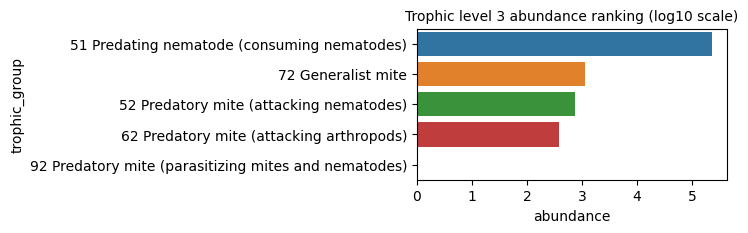

In [55]:
# trophic level 3
tl3_abund = {x: (y["Abundance"]) for x,y in G.nodes(data=True) if y["trophic_level"]==3 }
print(f"Ranking of abundances at trophic level 3:")
tl3_abund = sorted(tl3_abund.items(), key=itemgetter(1), reverse=True) 

# custom log function accepting 0 as value
def cust_log(tuple_list, base):
    l = []
    for x, y in tuple_list:
        if y != 0:
            l.append((x, math.log(y, base)))
        else:
            l.append((x, 0.0))  
    return l

log_tl3_abund = cust_log(tl3_abund, 10)

# plot trophic level 3 abundance
log_tl3_abund_df = pd.DataFrame(log_tl3_abund, columns= ["trophic_group", "abundance"])
fig, plot = plt.subplots(figsize = (4,2), dpi = 100)
sns.barplot(y="trophic_group", x="abundance", data=log_tl3_abund_df)
plot.set_title('Trophic level 3 abundance ranking (log10 scale)', fontsize = 10);

Ranking of abundances at trophic level 2 and 3:


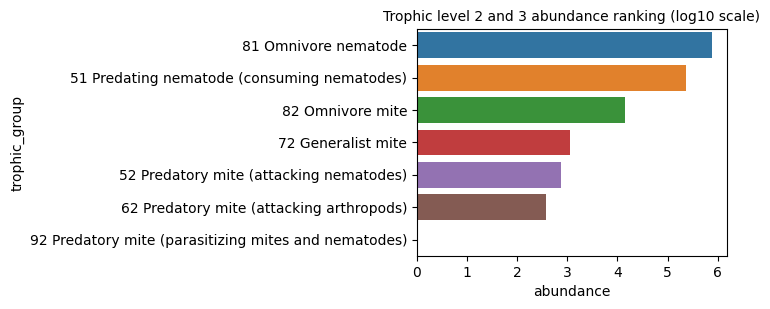

In [56]:
# trophic level 2 and 3
tl2and3_abund = {x: (y["Abundance"]) for x,y in G.nodes(data=True) if y["trophic_level"]== 2 or y["trophic_level"]==3}
print(f"Ranking of abundances at trophic level 2 and 3:")
tl2and3_abund = sorted(tl2and3_abund.items(), key=itemgetter(1), reverse=True)
log_tl2and3_abund = cust_log(tl2and3_abund, 10)

# plot trophic level 2 and 3 abundance
log_tl2and3_abund_df = pd.DataFrame(log_tl2and3_abund, columns= ["trophic_group", "abundance"])
fig, plot = plt.subplots(figsize = (4,3), dpi = 100)
sns.barplot(y="trophic_group", x="abundance", data=log_tl2and3_abund_df)
plot.set_title('Trophic level 2 and 3 abundance ranking (log10 scale)', fontsize = 10);